In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential

# colab setup

In [2]:
from google.colab import drive
drive.mount('/content/drive')
dataPathColab = "drive/MyDrive/keras_project/data"

Mounted at /content/drive


# local setup

In [ ]:
#dataPathLocal = "data"

## import and classify images.

In [3]:
batch_size = 128
img_height = 320
img_width = 180

In [4]:
train_ds, val_ds = keras.utils.image_dataset_from_directory(
    dataPathColab,
    validation_split=0.2,
    subset="both",
    seed=42,
    image_size=(img_height, img_width),
     batch_size=batch_size
)

Found 25757 files belonging to 53 classes.
Using 20606 files for training.
Using 5151 files for validation.


In [14]:
class_names = train_ds.class_names
print(class_names)

['basilisk', 'blitz', 'blizzard', 'buch_der_veraenderung', 'buschfeuer', 'doppelgaenger', 'drache', 'einhorn', 'elbenschuetzen', 'elbischer_bogen', 'erdwesen', 'feuerwesen', 'gebirge', 'gestaltwandler', 'glockenturm', 'grosse_flut', 'herr_der_bestien', 'hexenmeister', 'hoehle', 'hydra', 'insel', 'juwel_der_ordnung', 'kaiserin', 'kampfzeppelin', 'kerze', 'koenig', 'koenigin', 'kriegsherr', 'kriegsschiff', 'leichte_kavallerie', 'luftwesen', 'magierin', 'prinzessin', 'quelle_des_lebens', 'rauch', 'regensturm', 'ritter', 'rune_des_schutzes', 'sammler', 'schild_von_keth', 'schlachtross', 'schmiede', 'schwert_von_keth', 'spiegelung', 'sumpf', 'totenbeschwoerer', 'wald', 'waldlaeufer', 'wasserwesen', 'weltenbaum', 'wirbelsturm', 'zauberstab', 'zwergeninfanterie']


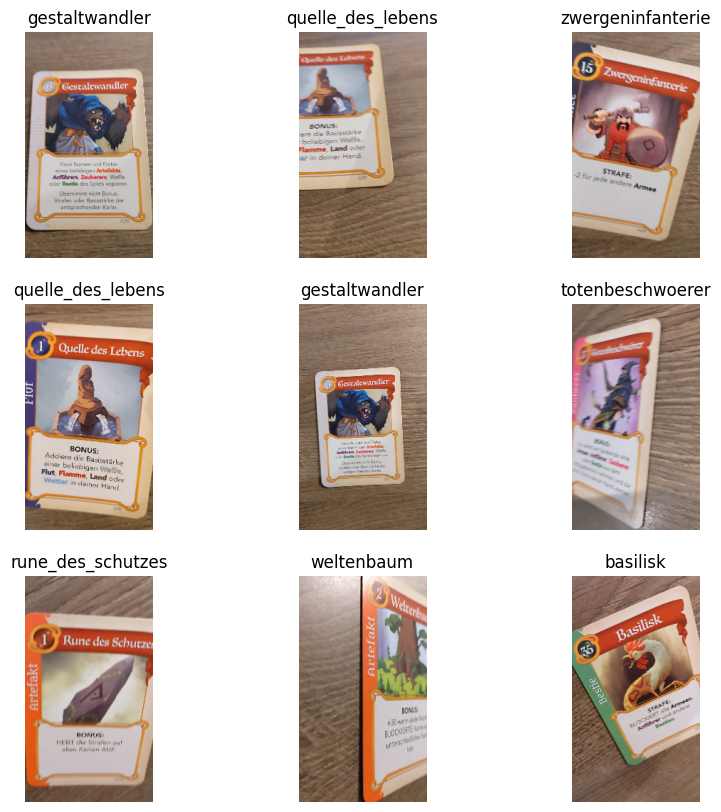

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [5]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

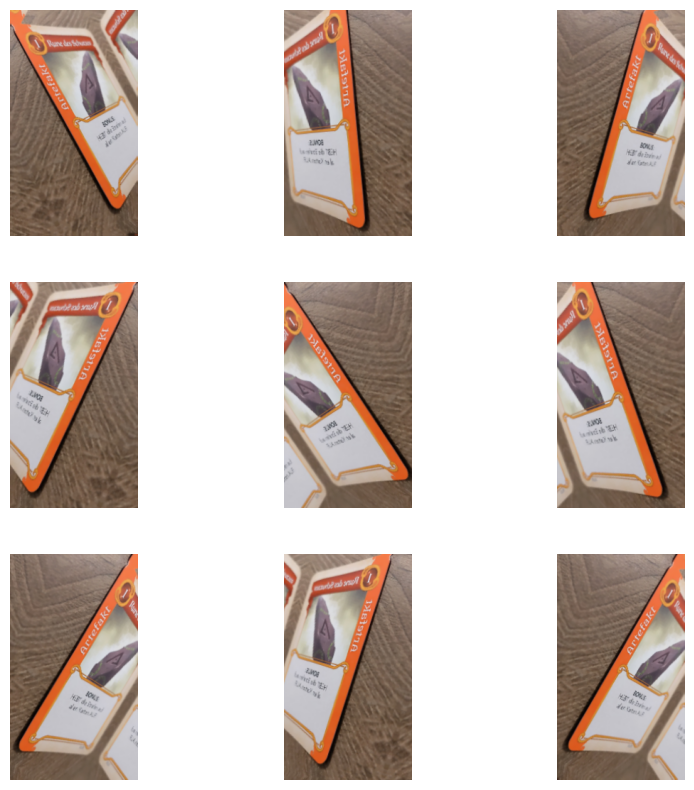

In [17]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
dataset_size = train_ds.cardinality().numpy()  # Get the number of elements in the dataset
print(dataset_size)

163


In [7]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(53, name="outputs")
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 320, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 320, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 320, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 160, 90, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 160, 90, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 80, 45, 64)        0         
 g2D)                                                 

In [ ]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
  8/161 [>.............................] - ETA: 33:04 - loss: 4.3844 - accuracy: 0.0205

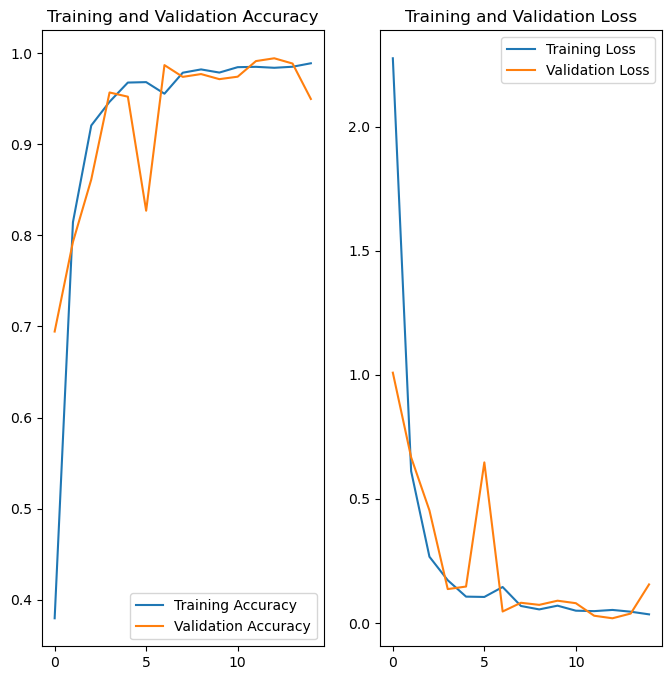

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## validate

In [ ]:
path = "G:/My Drive/keras_project/validation/4.jpg"

img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
This image most likely belongs to 37 with a 67.20 percent confidence.
